<a href="https://colab.research.google.com/github/applejxd/colaboratory/blob/master/GradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

原点からずれた点を中心に,、近似的に円状に分布する点を生成する関数

In [1]:
import numpy as np
from typing import List

# 再現性のためシードは固定
np.random.seed(42)

def get_point() -> List[float]:
    r = 10. + np.random.normal(0,0.5)
    center = [0.1, -0.2]

    theta = np.random.uniform(0, 2*np.pi)
    return [r*np.cos(theta)+center[0], r*np.sin(theta)+center[1]]
get_point()

[-1.0569801383343806, -10.382839472714007]

データ生成

In [2]:
data_list = []
for k in range(50):
    data_list.append(get_point())

data = np.array(data_list)
display(data)

array([[ -7.98315673,  -5.96929055],
       [  9.33204952,   3.32724182],
       [  6.69030475,  -7.56479591],
       [ 10.79948867,   1.19159928],
       [ 10.29868946,  -2.15149162],
       [  4.15625806,   8.68296843],
       [  4.27350919,   9.1851486 ],
       [ -9.109716  ,   3.99706926],
       [ -2.21657133,   8.54161628],
       [ -2.38464942,   8.96267771],
       [ -6.68197306,   7.36121701],
       [  3.43754038,  10.00070309],
       [ -9.74759427,  -1.08310126],
       [ -7.4901633 ,  -6.28438016],
       [  4.91521092,   8.62757303],
       [ -3.79506153,  -9.08325957],
       [ -9.06563139,   3.41877536],
       [  9.86088502,   1.94247449],
       [  8.07500899,  -5.3089931 ],
       [ -3.83649296,   9.43839288],
       [ -9.21503473,  -1.38080745],
       [  9.26594555,  -1.97330238],
       [  1.68806597, -10.17278033],
       [  8.9072666 ,   5.27293834],
       [  3.45773688,   9.31034319],
       [ -7.50764529,   6.2008276 ],
       [ -1.21724559,   9.56096783],
 

プロット

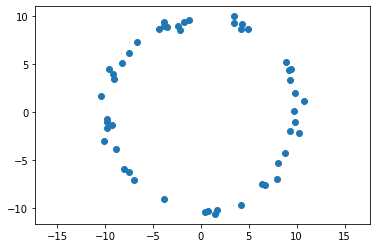

In [3]:
import matplotlib.pyplot as plt

# アスペクト比 1:1
plt.axes().set_aspect('equal', 'datalim')
# 散布図
plt.scatter(data[:,0],data[:,1])
plt.show()

このデータを中心・半径が未知の円として非線形フィッティング。
MSSは
\begin{equation}
  f(x_0,y_0,r) = \frac{1}{N}\sum_{k=1}^N 
    \left[\frac{(x_i-x_0)^2+(y_i-y_0)^2}{r^2} - 1\right]^2
\end{equation}
となる。
ただし計算の都合上、無次元で平方根が含まれない形になっている。
この関数の最適化を最急降下法で行う。

In [16]:
def residue(x0, y0, r) -> float:
    result = 0.
    for k in range(len(data)):
        result += (((data[k,0]-x0)**2+(data[k,1]-y0)**2)/r**2-1)**2
    return result/len(data)
residue(0.1, -0.2, 10.)

0.005860849564807571

In [5]:
def back_tracking():
    rho = 0.5